<a href="https://colab.research.google.com/github/deenukhan/Personalized-Medicine-Redefining-Cancer-Treatment/blob/main/personalized_cancer_dig_updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## About the Data

<h2 style="user-select: auto;"> Overview </h2>
<a href = "https://www.kaggle.com/c/msk-redefining-cancer-treatment/overview">Kaggle Link</a> 
<div class="markdown-converter__text--rendered"><p>A lot has been said during the past several years about how precision medicine and, more concretely, how genetic testing is going to disrupt the way diseases like cancer are treated.</p>
<p>But this is only partially happening due to the huge amount of manual work still required. Memorial Sloan Kettering Cancer Center (MSKCC) launched this competition, accepted by the <a href="https://nips.cc/Conferences/2017/CompetitionTrack">NIPS 2017 Competition Track</a>, &nbsp;because we need your help to take personalized medicine to its full potential.</p>
<p><img height="171" width="1066" alt="" src="https://storage.googleapis.com/kaggle-competitions/kaggle/6841/media/79842_Web-hero-image_ALT-3.jpg"></p>
<p>Once sequenced, a cancer tumor can have thousands of genetic mutations. But the challenge is distinguishing the mutations that contribute to tumor growth (drivers) from the neutral mutations (passengers).&nbsp;</p>
<p>Currently this interpretation of genetic mutations is being done manually. This is a very time-consuming task where a clinical pathologist has to manually review and classify every single genetic mutation based on evidence from text-based clinical literature.</p>
<p>For this competition MSKCC is making available an expert-annotated knowledge base where world-class researchers and oncologists have manually annotated thousands of mutations.</p>
<p>We need your help to develop a Machine Learning algorithm that, using this knowledge base as a baseline, automatically classifies genetic variations.</p>

<h2 style="user-select: auto;">Submission File</h2>
<p style="user-select: auto;">For each ID&nbsp;in the test set, you must predict a probability for each of the different classes a genetic mutation can be classified on. The file should contain a header and have the following format:</p>
<pre style="user-select: auto;">ID,class1,class2,class3,class4,class5,class6,class7,class8,class9<br style="user-select: auto;">0,0.1,0.7,0.05,0.05,0.1,0,0,0,0<br style="user-select: auto;">1,0.7,0.1,0.05,0.05,0.1,0,0,0,0<br style="user-select: auto;">2,0.05,0.05,0.1,0.7,0.1,0,0,0,0<br style="user-select: auto;">3,0,0,0,0,0.05,0.05,0.1,0,7,0,1<br style="user-select: auto;">etc.</pre>

<h2 style="user-select: auto;"> Data Description </h2>

<div class="sc-pAAKw bdWqNH" style="user-select: auto;"><div class="markdown-converter__text--rendered" style="user-select: auto;"><p style="user-select: auto;">In this competition you will develop algorithms to classify genetic mutations based on clinical evidence (text).</p>
<p style="user-select: auto;">There are nine different classes a genetic mutation can be classified on.</p>
<p style="user-select: auto;">This is not a trivial task since interpreting clinical evidence is very challenging even for human specialists. Therefore, modeling the clinical evidence (text) will be critical for the success of your approach.</p>
<p style="user-select: auto;">Both, training and test, data sets are provided via two different files. One (training/test_variants) provides the information about the genetic mutations, whereas the other (training/test_text) provides the clinical evidence (text) that our human experts used to classify the genetic mutations. Both are linked via the ID field.</p>
<p style="user-select: auto;">Therefore the genetic mutation (row) with ID=15 in the file training_variants, was classified using the clinical evidence (text) from the row with ID=15 in the file training_text</p>
<p style="user-select: auto;">Finally, to make it more exciting!! Some of the test data is machine-generated to prevent hand labeling. You will submit all the results of your classification algorithm, and we will ignore the machine-generated samples.&nbsp;</p>
<h2 style="user-select: auto;">File descriptions</h2>
<ul style="user-select: auto;">
<li style="user-select: auto;"><strong style="user-select: auto;">training_variants</strong>&nbsp;- a comma separated file containing the description of the genetic mutations used for training. Fields are <strong style="user-select: auto;">ID</strong> (the id of the row used to link the mutation to the clinical evidence), <strong style="user-select: auto;">Gene</strong> (the gene where this genetic mutation is located), <strong style="user-select: auto;">Variation</strong> (the aminoacid change for this mutations), <strong style="user-select: auto;">Class</strong> (1-9 the class this genetic mutation has been classified on)</li>
<li style="user-select: auto;"><strong style="user-select: auto;">training_text</strong>&nbsp;- a double pipe (||) delimited file that contains the clinical evidence (text) used to classify genetic mutations. Fields are <strong style="user-select: auto;">ID</strong> (the id of the row used to link the clinical evidence to the genetic mutation), <strong style="user-select: auto;">Text</strong> (the clinical evidence used to classify the genetic mutation)</li>
<li style="user-select: auto;"><strong style="user-select: auto;">test_variants</strong>&nbsp;-&nbsp;a comma separated file containing the description of the genetic mutations used for training. Fields are <strong style="user-select: auto;">ID</strong> (the id of the row used to link the mutation to the clinical evidence), <strong style="user-select: auto;">Gene</strong> (the gene where this genetic mutation is located), <strong style="user-select: auto;">Variation</strong> (the aminoacid change for this mutations)</li>
<li style="user-select: auto;"><strong style="user-select: auto;">test_text</strong> -&nbsp;a double pipe (||) delimited file that contains the clinical evidence (text) used to classify genetic mutations. Fields are <strong style="user-select: auto;">ID</strong> (the id of the row used to link the clinical evidence to the genetic mutation), <strong style="user-select: auto;">Text</strong> (the clinical evidence used to classify the genetic mutation)</li>
<li style="user-select: auto;"><strong style="user-select: auto;">submissionSample</strong>&nbsp;- a sample submission file in the correct format</li>
</ul></div></div>

## Extracting Data

In [1]:
#Below code is just to copy all the files into current session's drive and creating and deleting few required folders

import os
import zipfile
from tqdm import tqdm

!mkdir data

!cp "/content/drive/MyDrive/Study/Self Study/Case Study 2 - Cancer/personalized_cancer_dig_data/training_text.zip" /content/
!cp "/content/drive/MyDrive/Study/Self Study/Case Study 2 - Cancer/personalized_cancer_dig_data/training_variants.zip" /content/
!cp "/content/drive/MyDrive/Study/Self Study/Case Study 2 - Cancer/personalized_cancer_dig_data/stage2_test_variants.7z" /content/
!cp "/content/drive/MyDrive/Study/Self Study/Case Study 2 - Cancer/personalized_cancer_dig_data/stage2_test_text.7z" /content/

#-q is oppsoite of verbose, -d for decompressing to directory
!unzip -q /content/training_text.zip -d /content/data/
!unzip -q /content/training_variants.zip -d /content/data/

!7za e /content/stage2_test_text.7z
!mv /content/stage2_test_text.csv /content/data

!7za e /content/stage2_test_variants.7z
!mv /content/stage2_test_variants.csv /content/data



7-Zip (a) [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan /content/                   1 file, 9308786 bytes (9091 KiB)

Extracting archive: /content/stage2_test_text.7z
--
Path = /content/stage2_test_text.7z
Type = 7z
Physical Size = 9308786
Headers Size = 142
Method = LZMA:25
Solid = -
Blocks = 1

  0%     20% - stage2_test_text.csv                            48% - stage2_test_text.csv                            83% - stage2_test_text.csv                           Everything is Ok

Size:       60569525
Compressed: 9308786

7-Zip (a) [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7z

## Reading Data

In [19]:
#Importing the libraries
import pandas as pd
import numpy as np
import nltk
from tqdm import tqdm
nltk.download('stopwords')
import re
import string 

from nltk.corpus import stopwords
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import normalize
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
#Need to understand sep = "\|\|" this part further
train_variants = pd.read_csv('/content/data/training_variants')
train_text = pd.read_csv('/content/data/training_text', names = ['ID', 'text'], skiprows = 1, sep = "\|\|", engine = 'python')
test_variants = pd.read_csv('/content/data/stage2_test_variants.csv')
test_text = pd.read_csv('/content/data/stage2_test_text.csv', names = ['ID', 'text'], skiprows = 1, sep = "\|\|", engine = 'python')

## Overview

In [4]:
#First Let's Merge the text and variants data based on ID
train_text_variants = train_variants.merge(train_text, on = 'ID', how = 'left')

#Printing few details about data
print("Total Number of points in Training data   : ", train_text_variants.shape[0])
print("Total Number of Columns in Training data  : ", train_text_variants.shape[1])
print("Column Names in Training and Testing data : ", train_text_variants.columns)

Total Number of points in Training data   :  3321
Total Number of Columns in Training data  :  5
Column Names in Training and Testing data :  Index(['ID', 'Gene', 'Variation', 'Class', 'text'], dtype='object')


In [5]:
#Let's Checkout if we're having any missing values in our data
print(train_text_variants.isnull().sum())

print("\nWe are Having Missing Values in Text Column, Let's Remove them.")

#Dropping the Null values
train_text_variants.dropna(axis = 0, inplace = True)

ID           0
Gene         0
Variation    0
Class        0
text         5
dtype: int64

We are Having Missing Values in Text Column, Let's Remove them.


In [6]:
train_variants['Class'].value_counts()
#Dataset is highly imbalanced

# As we can See that our data is Highly Imabalanced, So It's better we use any upsampling or down sampling 
# techniuqe to deal with this, but as we are having less data points, so we will be using Upsampling only.

7    953
4    686
1    568
2    452
6    275
5    242
3     89
9     37
8     19
Name: Class, dtype: int64

In [7]:
#First Let's clean the text column below are the some operations we will be performing on this textual data
#Also Let's do some preprocessing on Gene and Variations column
def decontration(text):
    #below contractons are specific to words and cannot be solved by general solution
    text = re.sub(r"aren't", 'are not', text)
    text = re.sub(r"won't", 'will not', text)
    text = re.sub(r"doesn't", 'does not', text)
    #Below contractions are general and works for most of the word
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    return text.lower()

def cleaning_text(text):  
    text = decontration(text)
    text  = re.sub('[^A-Za-z0-9]+', ' ', text)
    #Removing Stopwords
    stop_words = set(stopwords.words('english'))
    processed_list = [word for word in text.split() if word not in stop_words]
    return " ".join(processed_list)

#Just applying the text cleaning functions to all the values of text column
preprocessed_text = []
for text in tqdm(train_text_variants['text']):
    preprocessed_text.append(cleaning_text(text))
train_text_variants['text'] = preprocessed_text

#Below Code is just for combining the values with "_", if more than one word is there
#and this task is just for simplicity as this is text data
train_text_variants['Gene'] = train_text_variants['Gene'].apply(lambda x: "_".join(x.split()))
train_text_variants['Variation'] = train_text_variants['Variation'].apply(lambda x: "_".join(x.split()))

100%|██████████| 3316/3316 [00:23<00:00, 138.94it/s]


In [8]:
#Now when have cleaned our data, Let's Split our data into train and cross validation and test parts.
#We we are using 64, 16 and 20 percent split of data

X = train_text_variants.drop(['ID', 'Class',], axis = 1)
y = train_text_variants['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y.values)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size = 0.2, stratify = y_train)
print("Training Data Shape : ", X_train.shape, y_train.shape)
print("Cross Validataion   : ", X_cv.shape, y_cv.shape)
print("Testing Data Shape  : ", X_test.shape, y_test.shape)

Training Data Shape :  (2121, 3) (2121,)
Cross Validataion   :  (531, 3) (531,)
Testing Data Shape  :  (664, 3) (664,)


In [9]:
#We will be using below Table to keep the record of Various Model Performances
from prettytable import PrettyTable
model_scores = PrettyTable()
model_scores.field_names = ["Model Name", "Train_Acc", "CV_Acc", "Test_Acc"]

## Vectorizing Features: 

In [10]:
#here we are using CountVectorizer for converting Gene feature into vector
#We also will be using response coding for the same task later
vectorizer_gene  = CountVectorizer()
vectorized_gene_train = vectorizer_gene.fit_transform(X_train['Gene'])
vectorized_gene_cv = vectorizer_gene.transform(X_cv['Gene'])
vectorized_gene_test = vectorizer_gene.transform(X_test['Gene'])

In [11]:
#here we are using CountVectorizer for converting Variation feature into vector
#We also will be using response coding for the same task later
vectorizer_variation  = CountVectorizer()
vectorized_variation_train = vectorizer_variation.fit_transform(X_train['Variation'])
vectorized_variation_cv = vectorizer_variation.transform(X_cv['Variation'])
vectorized_variation_test = vectorizer_variation.transform(X_test['Variation'])

In [12]:
#Now Let's Deal with the text column
#here we are using CountVectorizer for converting text feature into vector
#We also will be using response coding for the same task later
vectorizer_text  = CountVectorizer(min_df=5)
vectorized_text_train = normalize(vectorizer_text.fit_transform(X_train['text']))
vectorized_text_cv = normalize(vectorizer_text.transform(X_cv['text']))
vectorized_text_test = normalize(vectorizer_text.transform(X_test['text']))

In [13]:
#Now when we have our features converted into vectors let's put them together and create the data set
vectorized_train = np.hstack((vectorized_gene_train.toarray(), vectorized_variation_train.toarray(), vectorized_text_train.toarray()))
vectorized_cv = np.hstack((vectorized_gene_cv.toarray(), vectorized_variation_cv.toarray(), vectorized_text_cv.toarray()))
vectorized_test = np.hstack((vectorized_gene_test.toarray(), vectorized_variation_test.toarray(), vectorized_text_test.toarray()))

print("Vectorized Training Data Shape    : ", vectorized_train.shape)
print("Vectorized Cross Validation Shape : ", vectorized_cv.shape)
print("Vectorized Testing Data Shape     : ", vectorized_test.shape)

Vectorized Training Data Shape    :  (2121, 41815)
Vectorized Cross Validation Shape :  (531, 41815)
Vectorized Testing Data Shape     :  (664, 41815)


In [14]:
#plot_precsision_recall_heatmap function takes the cross validation data and the classifier and plot the heatmap
#for precision and recall for cross validation data
def plot_precision_recall_heatmap(vectorized_cv, y_cv, clf):
    y_preds = clf.predict(vectorized_cv)
    cf = confusion_matrix(y_cv, y_preds, labels=clf.classes_)
    cf_recall = [list(i/sum(i)) for i in cf]
    cf_precision = [list(i/sum(i)) for i in cf.transpose()]

    #Plotting the Precsion Matrix
    print("=="*25, " Precsision Matrix ", "=="*25)
    labels = [1,2,3,4,5,6,7,8,9]
    plt.figure(figsize=(18,6))
    sns.heatmap([list(i/sum(i)) for i in cf.transpose()], annot=True, cmap="YlGnBu", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Values')
    plt.ylabel("Original Values")
    plt.show()
    
    #Plotting the Recall Matrix
    print("\n","=="*25, " Recall Matrix ", "=="*25)
    plt.figure(figsize=(18,6))
    sns.heatmap([list(i/sum(i)) for i in cf], annot=True, cmap="YlGnBu", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Values')
    plt.ylabel("Original Values")
    plt.show()
     

### Response Coding

In [ ]:
#First Let's Take Gene Feature 
X_train['Gene']

## Random Model : 

In [ ]:
#Here We will be using dummy_classifier from sklearn, as this classifier is very simple and used for this purpose many times
from sklearn.dummy import DummyClassifier
from sklearn.metrics import log_loss
random_clf = DummyClassifier(strategy='uniform')
random_clf.fit(vectorized_train, y_train)

test_preds = random_clf.predict_proba(vectorized_test)
cv_preds = random_clf.predict_proba(vectorized_cv)
print("Multi Class Log Loss for Cross Validation data with RM : ", log_loss(y_cv, cv_preds))
print("Multi Class Log Loss for Test Data with Random Model   : ", log_loss(y_test, test_preds))

#Here We can se that we got 2.19 as our Log Loss with our dumb model.
#So Now can compare our other models with this logloss and find out how much good our model is.

Multi Class Log Loss for Cross Validation data with RM :  2.1972245773362196
Multi Class Log Loss for Test Data with Random Model   :  2.1972245773362196


## Analyzing Columns:

### Gene

In [ ]:
print("Total Number of Unique Gene : ", X_train['Gene'].nunique())
print(X_train['Gene'].value_counts()[:5])

#We can see here Gene is the Categorical Variable.
#We have Total 231 Unique Gene in our Training data and BRCA1 is the most common Gene we are having.
#But Now We Need to answer most important question about this column.
#1. Is the Gene Column contributing in the predicting the dependent variable.
#There are many ways to answer the above question but one of the most popular way is that, 
#We create a random model and and calculate the loss metric and compare it with creating another model
#with Gene feature only and if the loss is considerbally less than our random model, means Gene Feature is usefull
#In Order to create Random Model, first we need to do Data Preprocessing on these columns, let's do this first
#As Gene is the Categorical Variable, we can use Several ways to represnt in Vector form, we will be using two techniques
#       1. OneHotEncoding
#       2. Response Coding

Total Number of Unique Gene :  238
BRCA1    161
TP53     114
EGFR      93
BRCA2     86
PTEN      83
Name: Gene, dtype: int64


In [ ]:
#Here We are going to use Naive Bayes Model to check weather feature Gene is usefull or not.
#We can use anyother model for this task. Here we will be performing Paramter tunning as well
#In Naive bayes we have alpha as our hyper parameter
from sklearn.naive_bayes import MultinomialNB
alphas = [0.001, 0.01, 0.1, 1, 10, 100]
cv_log_loss = []
test_log_loss = []

for alpha in alphas:
    nb_clf = MultinomialNB(alpha = alpha)
    nb_clf.fit(vectorized_gene_train, y_train)
    preds_prob_cv = nb_clf.predict_proba(vectorized_gene_cv)
    preds_prob_test = nb_clf.predict_proba(vectorized_gene_test)
    loss_cv = log_loss(y_cv, preds_prob_cv)
    loss_test = log_loss(y_test, preds_prob_test)
    cv_log_loss.append(loss_cv)
    test_log_loss.append(loss_test)
    print("CV Log Loss at Alpha {} is  = {}".format(alpha, loss_cv))
    print("Test Log Loss at Alpha {} is  = {}".format(alpha, loss_test))
print("\nBest Hyper Parameter is {} with Log Loss {}".format(alphas[cv_log_loss.index(min(cv_log_loss))], min(cv_log_loss)))
print("Best Hyper Parameter is {} with Test Loss {}".format(alphas[test_log_loss.index(min(test_log_loss))], min(test_log_loss)))

print('\nHere We can see that our CV Loss is 1.22 at best alpha 0.1 and Test Loss is 1.19')
print("and This Loss is way less than our loss of Random Model which is 2.19")
print("Here We can conclude that Gene as a feature is contributing in Predicting the Cancer Class")

CV Log Loss at Alpha 0.001 is  = 1.4636026128880026
Test Log Loss at Alpha 0.001 is  = 1.4194397286477902
CV Log Loss at Alpha 0.01 is  = 1.322545141627616
Test Log Loss at Alpha 0.01 is  = 1.2840183790209425
CV Log Loss at Alpha 0.1 is  = 1.2262150703000865
Test Log Loss at Alpha 0.1 is  = 1.1901904465565591
CV Log Loss at Alpha 1 is  = 1.2903155199157408
Test Log Loss at Alpha 1 is  = 1.243907783728943
CV Log Loss at Alpha 10 is  = 1.5284152581486392
Test Log Loss at Alpha 10 is  = 1.492966185587538
CV Log Loss at Alpha 100 is  = 1.754876874553541
Test Log Loss at Alpha 100 is  = 1.74463498767001

Best Hyper Parameter is 0.1 with Log Loss 1.2262150703000865
Best Hyper Parameter is 0.1 with Test Loss 1.1901904465565591

Here We can see that our CV Loss is 1.22 at best alpha 0.1 and Test Loss is 1.19
and This Loss is way less than our loss of Random Model which is 2.19
Here We can conclude that Gene as a feature is contributing in Predicting the Cancer Class


### Variation

In [ ]:
print("Total Number of Unique Variations : ", X_train['Variation'].nunique())
print(X_train['Variation'].value_counts()[:5])

#We can see here Variation is the Categorical Variable.
#We have Total 1919 Unique Variation and Truncating_Mutations is the most common Variation we are having.
#But Now We Need to answer most important question about this column.
#1. Is the Variation Column contributing in the predicting the dependent variable.
#There are many ways to answer the above question but one of the most popular way is that, 
#We create a random model and and calculate the loss metric and compare it with creating another model
#with Variation feature only and if the loss is considerbally less than our random model, means Gene Feature is usefull
#In Order to create Random Model, first we need to do Data Preprocessing on these columns, let's do this first
#As Variation is the Categorical Variable, we can use Several ways to represnt in Vector form, we will be using two techniques
#       1. OneHotEncoding
#       2. Response Coding

Total Number of Unique Variations :  1916
Truncating_Mutations    56
Deletion                54
Amplification           49
Fusions                 19
Overexpression           5
Name: Variation, dtype: int64


In [ ]:
#Here We are going to use Naive Bayes Model to check weather feature Variation is usefull or not.
#We can use any other model for this task. Here we will be performing Paramter tunning as well
#In Naive bayes we have alpha as our hyper parameter
from sklearn.naive_bayes import MultinomialNB
alphas = [0.001, 0.01, 0.1, 1, 10, 100]
cv_log_loss = []
test_log_loss = []

for alpha in alphas:
    nb_clf = MultinomialNB(alpha = alpha)
    nb_clf.fit(vectorized_variation_train, y_train)
    preds_prob_cv = nb_clf.predict_proba(vectorized_variation_cv)
    preds_prob_test = nb_clf.predict_proba(vectorized_variation_test)
    loss_cv = log_loss(y_cv, preds_prob_cv)
    loss_test = log_loss(y_test, preds_prob_test)
    cv_log_loss.append(loss_cv)
    test_log_loss.append(loss_test)
    print("CV Log Loss at Alpha {} is  = {}".format(alpha, loss_cv))
    print("Test Log Loss at Alpha {} is  = {}".format(alpha, loss_test))
print("\nBest Hyper Parameter is {} with Log Loss {}".format(alphas[cv_log_loss.index(min(cv_log_loss))], min(cv_log_loss)))
print("Best Hyper Parameter is {} with Test Loss {}".format(alphas[test_log_loss.index(min(test_log_loss))], min(test_log_loss)))

print('\nHere We can see that our CV Loss is 1.711 at best alpha 0.1 and Test Loss is 1.69')
print("and This Loss is way less than our loss of Random Model which is 2.19")
print("Here We can conclude that Variation as a feature is contributing in Predicting the Cancer Class")

CV Log Loss at Alpha 0.001 is  = 1.7850590202156127
Test Log Loss at Alpha 0.001 is  = 1.736942187318968
CV Log Loss at Alpha 0.01 is  = 1.741048088347862
Test Log Loss at Alpha 0.01 is  = 1.7106091985521499
CV Log Loss at Alpha 0.1 is  = 1.7118932507624252
Test Log Loss at Alpha 0.1 is  = 1.6936690713166698
CV Log Loss at Alpha 1 is  = 1.7183861214694203
Test Log Loss at Alpha 1 is  = 1.7072555757344177
CV Log Loss at Alpha 10 is  = 1.7660430399015365
Test Log Loss at Alpha 10 is  = 1.7582061264439695
CV Log Loss at Alpha 100 is  = 1.8153526954335315
Test Log Loss at Alpha 100 is  = 1.8126717100878043

Best Hyper Parameter is 0.1 with Log Loss 1.7118932507624252
Best Hyper Parameter is 0.1 with Test Loss 1.6936690713166698

Here We can see that our CV Loss is 1.711 at best alpha 0.1 and Test Loss is 1.69
and This Loss is way less than our loss of Random Model which is 2.19
Here We can conclude that Variation as a feature is contributing in Predicting the Cancer Class


### text

In [ ]:
#Here We are going to use Naive Bayes Model to check weather feature Variation is usefull or not.
#We can use any other model for this task. Here we will be performing Paramter tunning as well
#In Naive bayes we have alpha as our hyper parameter
from sklearn.naive_bayes import MultinomialNB
alphas = [0.001, 0.01, 0.1, 1, 10, 100]
cv_log_loss = []
test_log_loss = []

for alpha in alphas:
    nb_clf = MultinomialNB(alpha = alpha)
    nb_clf.fit(vectorized_text_train, y_train)
    preds_prob_cv = nb_clf.predict_proba(vectorized_text_cv)
    preds_prob_test = nb_clf.predict_proba(vectorized_text_test)
    loss_cv = log_loss(y_cv, preds_prob_cv)
    loss_test = log_loss(y_test, preds_prob_test)
    cv_log_loss.append(loss_cv)
    test_log_loss.append(loss_test)
    print("CV Log Loss at Alpha {} is  = {}".format(alpha, loss_cv))
    print("Test Log Loss at Alpha {} is  = {}".format(alpha, loss_test))
print("\nBest Hyper Parameter is {} with Log Loss {}".format(alphas[cv_log_loss.index(min(cv_log_loss))], min(cv_log_loss)))
print("Best Hyper Parameter is {} with Test Loss {}".format(alphas[test_log_loss.index(min(test_log_loss))], min(test_log_loss)))

print('\nHere We can see that our CV Loss is 1.56 at best alpha 0.1 and Test Loss is 1.60')
print("and This Loss is way less than our loss of Random Model which is 2.19")
print("Here We can conclude that text as a feature is contributing in Predicting the Cancer Class")

CV Log Loss at Alpha 0.001 is  = 1.6801522674893121
Test Log Loss at Alpha 0.001 is  = 1.6926939569061978
CV Log Loss at Alpha 0.01 is  = 1.5678869431597027
Test Log Loss at Alpha 0.01 is  = 1.605925635473116
CV Log Loss at Alpha 0.1 is  = 2.4693684709598087
Test Log Loss at Alpha 0.1 is  = 2.2906924860779285
CV Log Loss at Alpha 1 is  = 3.533550001652461
Test Log Loss at Alpha 1 is  = 3.251911905455333
CV Log Loss at Alpha 10 is  = 2.397319135776618
Test Log Loss at Alpha 10 is  = 2.2794180779047655
CV Log Loss at Alpha 100 is  = 1.808629831974369
Test Log Loss at Alpha 100 is  = 1.789410331679854

Best Hyper Parameter is 0.01 with Log Loss 1.5678869431597027
Best Hyper Parameter is 0.01 with Test Loss 1.605925635473116

Here We can see that our CV Loss is 1.56 at best alpha 0.1 and Test Loss is 1.60
and This Loss is way less than our loss of Random Model which is 2.19
Here We can conclude that text as a feature is contributing in Predicting the Cancer Class


## Other Models:

### Naive Bayes: 

Log Loss at Alpha 0.0001 is  = 1.1032349433338444
Log Loss at Alpha 0.001 is  = 1.0987520556292067
Log Loss at Alpha 0.01 is  = 1.109022561964913
Log Loss at Alpha 0.1 is  = 1.1860862677836526
Log Loss at Alpha 1 is  = 1.333230058043797
Log Loss at Alpha 10 is  = 1.3459216518909904
Log Loss at Alpha 100 is  = 1.331655986245146

Best Hyper Parameter is 0.001 with Log Loss 1.0987520556292067



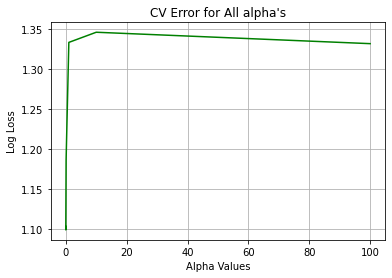

In [22]:
#First Let's try Naive bayes Model and we will be performing Parameter Tuning as well
#In Naive bayes we have alpha as our hyper parameter
alphas = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
log_loss_list = []
for alpha in alphas:
    clf = MultinomialNB(alpha = alpha)
    clf.fit(vectorized_train, y_train)
    calb_clf = CalibratedClassifierCV(clf, method='sigmoid')
    calb_clf.fit(vectorized_train, y_train)
    preds_prob_cv = calb_clf.predict_proba(vectorized_cv)
    loss = log_loss(y_cv, preds_prob_cv)
    log_loss_list.append(loss)
    print("Log Loss at Alpha {} is  = {}".format(alpha, loss))
print("\nBest Hyper Parameter is {} with Log Loss {}\n".format(alphas[log_loss_list.index(min(log_loss_list))], min(log_loss_list)))

plt.plot(alphas, log_loss_list, c = 'g')
plt.grid()
plt.title("CV Error for All alpha's")
plt.xlabel("Alpha Values")
plt.ylabel("Log Loss")
plt.show()
#Here We can see that our Loss is 1.16 at best alpha 0.1
#and This Loss is way less than our loss of Random Model which 2.19
#Here We can conclude that Gene as feature is contributing in Predicting the Cancer Class

In [30]:
#So Now When we have our best Hyper Parameter let's train our model
clf = MultinomialNB(alpha = 0.001)
clf.fit(vectorized_train, y_train)
calb_clf = CalibratedClassifierCV(clf, method='sigmoid')
calb_clf.fit(vectorized_train, y_train)
cv_preds = calb_clf.predict_proba(vectorized_cv)
test_preds = calb_clf.predict_proba(vectorized_test)
train_preds = calb_clf.predict_proba(vectorized_train)

print("Train Log Loss : ", log_loss(y_train, train_preds))
print("CV Log Loss    : ", log_loss(y_cv, cv_preds))
print("Test Log Loss  : ", log_loss(y_test, test_preds))

#Here We can see that training, CV and testing logs are similar to each other
#This Confirms that our model is not overfitting

Train Log Loss :  0.5420552345462397
CV Log Loss    :  1.0987520556292067
Test Log Loss  :  1.1627875586055245


==================================================  Precsision Matrix  ==================================================


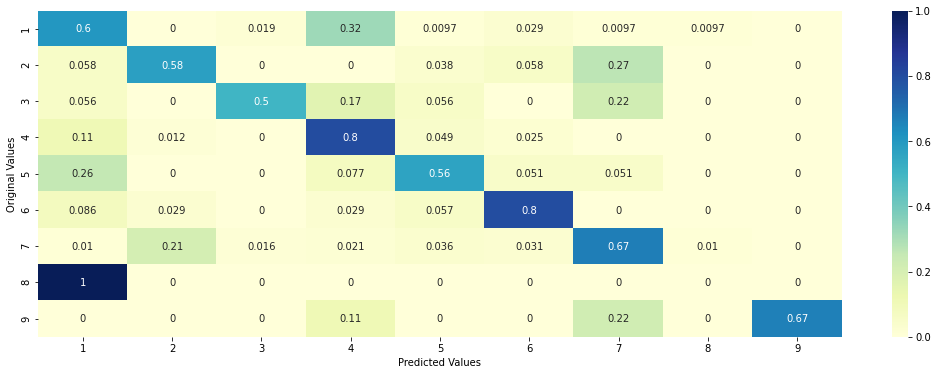


 ==================================================  Recall Matrix  ==================================================


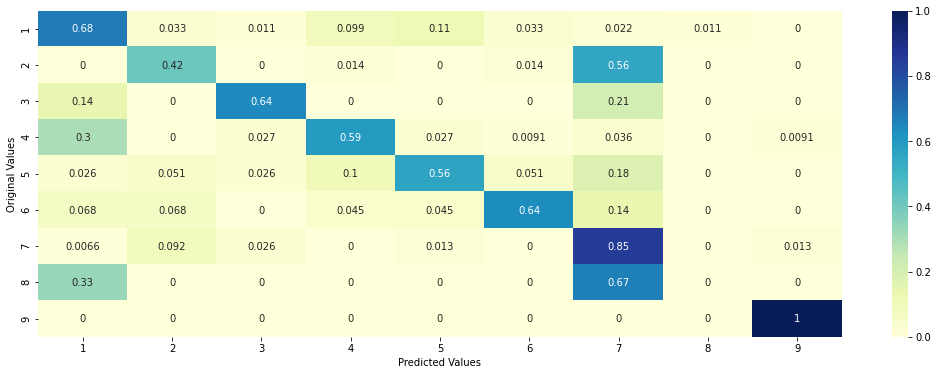

In [32]:
#As we can see we have 9 classes to predict, so when we want find out the actual performance of our model
#Then it's good idea to check the performance class wise, because sometimes our model predict very well on few classes
#and very poor on other classes and if our model is good for most of the classes and poor on 1 or 2 classes which is less
#frequent then also we may consider our model to be good. and this totaly depends on sceneario and requirements.

plot_precision_recall_heatmap(vectorized_cv, y_cv, clf)

#Here we can see that our model is working cosiderbally good on class 1, 2, 4, 6, 7, 8, 9
#But on class 3 and 5 model is not so much good.
#Same we can check the recall as well.

### Logistic Regression

Log Loss at Alpha 0.0001 is  = 1.0014041946170387
Log Loss at Alpha 0.001 is  = 1.1761176014484658
Log Loss at Alpha 0.01 is  = 1.675683689012762
Log Loss at Alpha 0.1 is  = 2.0409614180889735
Log Loss at Alpha 1 is  = 2.089847170210001
Log Loss at Alpha 10 is  = 2.141115479920478

Best Hyper Parameter is 0.0001 with Log Loss 1.0014041946170387



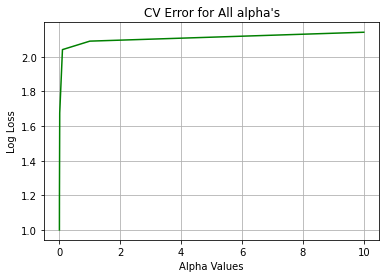

In [ ]:
#First Let's try Naive bayes Model and we will be performing Parameter Tuning as well
#In Naive bayes we have alpha as our hyper parameter

alphas = [0.0001, 0.001, 0.01, 0.1, 1, 10]
log_loss_list = []

for alpha in alphas:
    clf = SGDClassifier(class_weight='balanced', alpha=alpha, penalty='l2', loss='log', random_state=95)
    clf.fit(vectorized_train, y_train)
    calb_clf = CalibratedClassifierCV(clf, method='sigmoid')
    calb_clf.fit(vectorized_train, y_train)
    preds_prob_cv = calb_clf.predict_proba(vectorized_cv)
    loss = log_loss(y_cv, preds_prob_cv)
    log_loss_list.append(loss)
    print("Log Loss at Alpha {} is  = {}".format(alpha, loss))
print("\nBest Hyper Parameter is {} with Log Loss {}\n".format(alphas[log_loss_list.index(min(log_loss_list))], min(log_loss_list)))

plt.plot(alphas, log_loss_list, c = 'g')
plt.grid()
plt.title("CV Error for All alpha's")
plt.xlabel("Alpha Values")
plt.ylabel("Log Loss")
plt.show()
#Here We can see that our Loss is 1.16 at best alpha 0.1
#and This Loss is way less than our loss of Random Model which 2.19
#Here We can conclude that Gene as feature is contributing in Predicting the Cancer Class

In [33]:
#So Now When we have our best Hyper Parameter let's train our model
clf = SGDClassifier(class_weight='balanced', alpha=0.0001, penalty='l2', loss='log', random_state=42)
clf.fit(vectorized_train, y_train)
calb_clf = CalibratedClassifierCV(clf, method='sigmoid')
calb_clf.fit(vectorized_train, y_train)
cv_preds = calb_clf.predict_proba(vectorized_cv)
test_preds = calb_clf.predict_proba(vectorized_test)
train_preds = calb_clf.predict_proba(vectorized_train)

print("Train Log Loss : ", log_loss(y_train, train_preds))
print("CV Log Loss    : ", log_loss(y_cv, cv_preds))
print("Test Log Loss  : ", log_loss(y_test, test_preds))

#Here We can see that training, CV and testing logs are similar to each other
#This Confirms that our model is not overfitting

Train Log Loss :  0.39879551829758986
CV Log Loss    :  0.935251642832111
Test Log Loss  :  1.0016253354081914


==================================================  Precsision Matrix  ==================================================


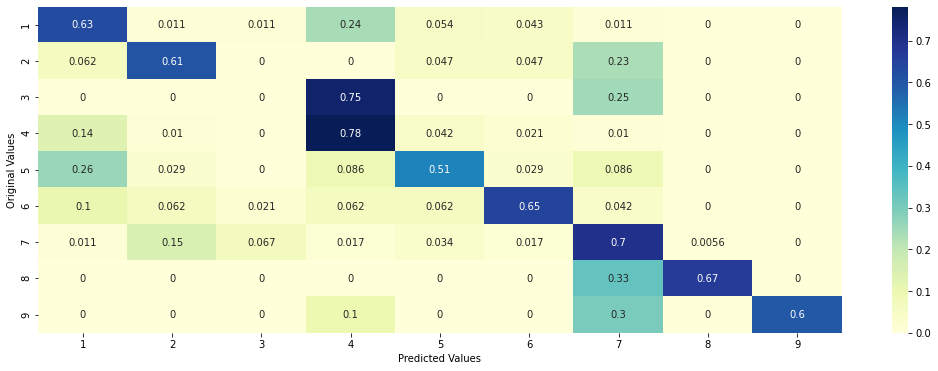


 ==================================================  Recall Matrix  ==================================================


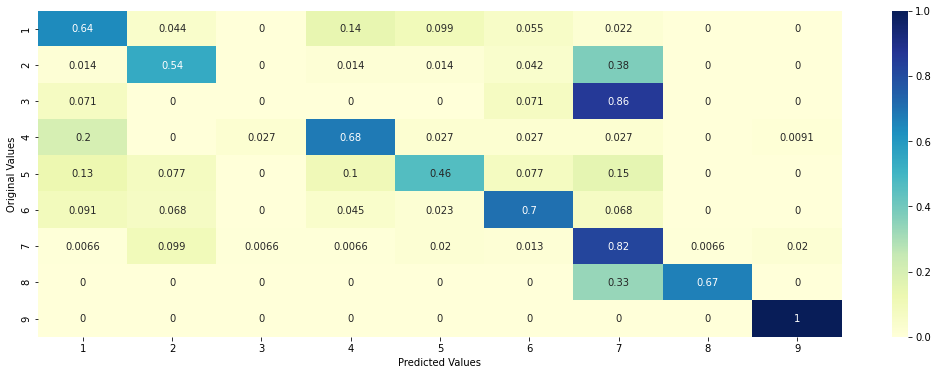

In [36]:
#As we can see we have 9 classes to predict, so when we want find out the actual performance of our model
#Then it's good idea to check the performance class wise, because sometimes our model predict very well on few classes
#and very poor on other classes and if our model is good for most of the classes and poor on 1 or 2 classes which is less
#frequent then also we may consider our model to be good. and this totaly depends on sceneario and requirements.

plot_precision_recall_heatmap(vectorized_cv, y_cv, clf)

#Here we can see that our model is working cosiderbally good on class 1, 2, 4, 6, 7, 8, 9
#But on class 3 and 5 model is not so much good.
#Same we can check the recall as well.

### KNN

Log Loss at Alpha 5 is  = 1.0933936905958526
Log Loss at Alpha 11 is  = 1.125272604677224
Log Loss at Alpha 15 is  = 1.142904620989123
Log Loss at Alpha 21 is  = 1.173404395206928
Log Loss at Alpha 31 is  = 1.2071586537867467
Log Loss at Alpha 41 is  = 1.2240992876330699
Log Loss at Alpha 51 is  = 1.2462597526379
Log Loss at Alpha 99 is  = 1.2859324469005995

Best Hyper Parameter is 5 with Log Loss 1.0933936905958526



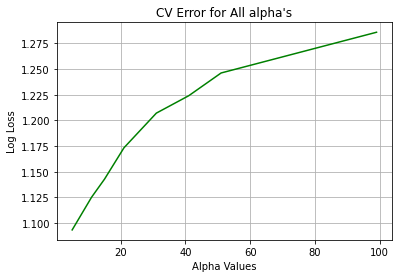

In [ ]:

#First Let's try Naive bayes Model and we will be performing Parameter Tuning as well
#In Naive bayes we have alpha as our hyper parameter
#alpha here is number of neighbors
alphas = [5, 11, 15, 21, 31, 41, 51, 99]
log_loss_list = []

for alpha in alphas:
    clf = KNeighborsClassifier(n_neighbors=alpha)
    clf.fit(vectorized_train, y_train)
    calb_clf = CalibratedClassifierCV(clf, method='sigmoid')
    calb_clf.fit(vectorized_train, y_train)
    preds_prob_cv = calb_clf.predict_proba(vectorized_cv)
    loss = log_loss(y_cv, preds_prob_cv)
    log_loss_list.append(loss)
    print("Log Loss at Alpha {} is  = {}".format(alpha, loss))
print("\nBest Hyper Parameter is {} with Log Loss {}\n".format(alphas[log_loss_list.index(min(log_loss_list))], min(log_loss_list)))

plt.plot(alphas, log_loss_list, c = 'g')
plt.grid()
plt.title("CV Error for All alpha's")
plt.xlabel("Alpha Values")
plt.ylabel("Log Loss")
plt.show()
#Here We can see that our Loss is 1.16 at best alpha 0.1
#and This Loss is way less than our loss of Random Model which 2.19
#Here We can conclude that Gene as feature is contributing in Predicting the Cancer Class

In [ ]:
#So Now When we have our best Hyper Parameter let's train our model
clf =  KNeighborsClassifier(n_neighbors=5)
clf.fit(vectorized_train, y_train)
calb_clf = CalibratedClassifierCV(clf, method='sigmoid')
calb_clf.fit(vectorized_train, y_train)
cv_preds = calb_clf.predict_proba(vectorized_cv)
test_preds = calb_clf.predict_proba(vectorized_test)
train_preds = calb_clf.predict_proba(vectorized_train)

print("Train Log Loss : ", log_loss(y_train, train_preds))
print("CV Log Loss    : ", log_loss(y_cv, cv_preds))
print("Test Log Loss  : ", log_loss(y_test, test_preds))

#Here We can see that training, CV and testing logs are similar to each other
#This Confirms that our model is not overfitting

In [ ]:
#As we can see we have 9 classes to predict, so when we want find out the actual performance of our model
#Then it's good idea to check the performance class wise, because sometimes our model predict very well on few classes
#and very poor on other classes and if our model is good for most of the classes and poor on 1 or 2 classes which is less
#frequent then also we may consider our model to be good. and this totaly depends on sceneario and requirements.

plot_precision_recall_heatmap(vectorized_cv, y_cv, clf)

#Here we can see that our model is working cosiderbally good on class 1, 2, 4, 6, 7, 8, 9
#But on class 3 and 5 model is not so much good.
#Same we can check the recall as well.

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
test_preds[0]

array([0.06334707, 0.28219475, 0.04454006, 0.07178682, 0.05022225,
       0.01990823, 0.41422293, 0.02809235, 0.02568554])

In [ ]:
#Now When we have best hyper parameter Let's Train our Model again and check performance
nb_clf = MultinomialNB(alpha = 0.1)
nb_clf = fit.

In [ ]:
model_scores.add_row(['Naive_Bayes', 'NA', '1.16', 'NA'])

In [ ]:
print(model_scores)

+-------------+-----------+--------+----------+
|  Model Name | Train_Acc | CV_Acc | Test_Acc |
+-------------+-----------+--------+----------+
| Naive_Bayes |     NA    |  1.16  |    NA    |
+-------------+-----------+--------+----------+


In [ ]:
sub_cols = ['class1', 'class2', 'class3', 'class4', 'class5', 'class6', 'class7', 'class8', 'class9']
submission = pd.DataFrame(y_preds, columns=sub_cols)
submission.insert(0, "ID", test_text['ID'])
submission.to_csv('submission_can.csv', index = False)